In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import kagglehub
import os

# Download the dataset
dataset_path = kagglehub.dataset_download('irfanakbarihabibi/list-of-food-ingredients-with-halal-label')
print(f"Dataset downloaded to: {dataset_path}")

# Find the actual CSV file (usually inside a subfolder)
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            print(f"Found CSV: {csv_path}")

# Load the dataset
df = pd.read_csv(csv_path)
print(df.head(10))
print(df.info())
print("\nLabel distribution:")
print(df['label'].value_counts())

100%|██████████| 27.7M/27.7M [00:03<00:00, 9.58MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/irfanakbarihabibi/list-of-food-ingredients-with-halal-label/versions/18
Found CSV: /root/.cache/kagglehub/datasets/irfanakbarihabibi/list-of-food-ingredients-with-halal-label/versions/18/2024-feb-final.csv
                                                text  label
0  water peaches sugar carrageenan natural and ar...  haram
1  powdered sugar sugar corn starch almond flour ...  haram
2  orange juice banana puree grape juice and stra...  haram
3  sugar corn syrup white chocolate sugar cocoa b...  haram
4  purified water sugar aloe vera gel artificial ...  haram
5  water peaches sugar carrageenan cochineal extr...  haram
6  water organic aloe vera juice aloe vera gel su...  haram
7  water organic aloe vera juice cane sugar aloe ...  haram
8  water organic aloevera juice aloe vera gel sug...  haram
9  water aloe vera juice fructose aloe vera gel s...  haram
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528092 entries, 0 to 528091
D

In [2]:
df = df.dropna(subset=['text'])
df['text'] = df['text'].str.lower().str.strip()

df['label'] = df['label'].replace('Mushbooh', 'Haram')

df['label'] = df['label'].map({'halal': 0, 'haram': 1})

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [4]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), analyzer='char_wb')),
    ('clf', LinearSVC(class_weight='balanced'))
])

model.fit(X_train, y_train)




Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 3))),
                ('clf', LinearSVC(class_weight='balanced'))])

In [5]:
preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
print(classification_report(y_test, preds, target_names=['Halal', 'Haram']))


Accuracy: 0.9791
              precision    recall  f1-score   support

       Halal       0.98      0.98      0.98     58384
       Haram       0.97      0.98      0.98     47235

    accuracy                           0.98    105619
   macro avg       0.98      0.98      0.98    105619
weighted avg       0.98      0.98      0.98    105619



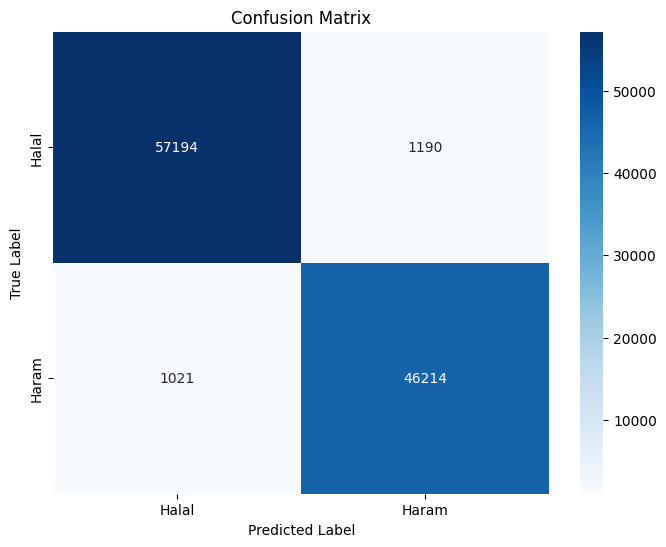

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Halal', 'Haram'], yticklabels=['Halal', 'Haram'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [7]:
joblib.dump(model, 'halal_haram_classifier.pkl')

['halal_haram_classifier.pkl']